# Multimedia Security and Privacy
## TP 5
Tientso Ning

In [10]:
import numpy as np
from scipy.stats import norm
from scipy import ndimage
import cv2
import matplotlib.pyplot as plt

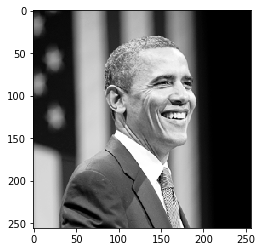

In [35]:
#read the image as grayscale
x = cv2.imread("obama.png", 0)
plt.imshow(x, cmap="Greys_r")

# numerically means via experimental runs, so
# TODO: we want to get the code from TP4 and do a slight refactor so we can run with parameters

In [37]:
#define a function that embeds a watermark to an image and returns the image
def create_wm (size, density):
    
    #create a uniform distributed -1/1s
    w_ = np.random.randint(0,2,(size))
    w_[w_ < 1] = -1
    
    #random sampling of density
    assert density > 0 and density < 1
    q_ = np.copy(w_).flatten()
    for i in range(0,len(q_)):
        roll = np.random.random()
        if roll < density:
            q_[i] = 0
    q_ = np.reshape(q_, w_.shape)
    w_ = q_
    return w_

def rho_non_blind (y, x, w_, density):
    '''
    given an embedded-watermarked image y, find the rho value with non-blind
    '''
    z = np.random.random((y.shape))
    v = y + z
    w_nonblind = v-x
    return np.sum(np.multiply(w_nonblind, w_))/(w_.shape[0]*w_.shape[1]*density)

def rho_blind (y, w_, density):
    '''
    given an embedded-watermarked image y, find the rho value with blind
    '''
    z = np.random.random((y.shape))
    v = y + z
    v_ = ndimage.uniform_filter(v, size=4)
    w_blind = v - v_
    return np.sum(np.multiply(w_blind, w_))/(w_.shape[0]*w_.shape[1]*density)

In [48]:
#determine numerically probability of false, miss, and detection
w_ = create_wm(x.shape, 0.1)
y = x + w_
threshold = rho_non_blind(y, x, w_, 0.1)
pf = 0
pm = 0
pd = 1-pm

print("Threshold is: ", threshold)
print("Probability of false is: ", pf)
print("Probability of miss is: ", pm)
print("Probability of detection is: ", pd)

Threshold is:  9.02140651223673
Probability of false is:  0
Probability of miss is:  0
Probability of detection is:  1


In [5]:
#plot the estimated curve of probabilities as a function of T_rho_non-blind